In [1]:
import numpy as np
from helpers import *
from cross_validation import *
from img_preprocessing import *

# Load the training set
root_dir = "training/"
n = 100 #choose the number of images for the train

image_dir = root_dir + "images/"
files = os.listdir(image_dir)
print("Loading " + str(n) + " images")
imgs = np.asarray([load_image(image_dir + files[i]) for i in range(n)])

gt_dir = root_dir + "groundtruth/"
print("Loading " + str(n) + " gt_images")
gt_imgs = np.asarray([load_image(gt_dir + files[i]) for i in range(n)])

Loading 100 images
Loading 100 gt_images


# Preprocessing :

To have good results with clustering it is necessary to change the patch size

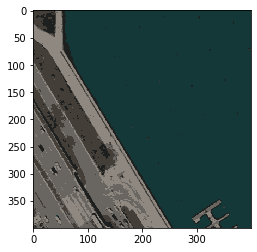

In [2]:
imgs_med = median(imgs,3,n)
img_pre = np.array([preprocess_image_rgb(imgs_med[i]) for i in range(n)])

k = 5
max_iter = 100
threshold = 1e-4

img_cluster = np.array([kmean_compression(imgs_med[i], img_pre[i], k, max_iter, threshold) for i in range(n)])
plt.imshow(img_cluster[2])

In [3]:
from logistic_regression import LogisticModel

model = LogisticModel()

In [4]:
np.random.seed(1) 
cross_validation(model, gt_imgs, img_cluster, 4, 1,16)

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Training completed
Accuracy: 0.713472


//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Training completed
Accuracy: 0.739648


//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Training completed
Accuracy: 0.746048


//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Training completed
Accuracy: 0.772032
[0.713472 0.739648 0.746048 0.772032]
Average accuracy: 0.7428000000000001
